Fonte: [https://projecteuler.net/problem=83](https://projecteuler.net/problem=83)

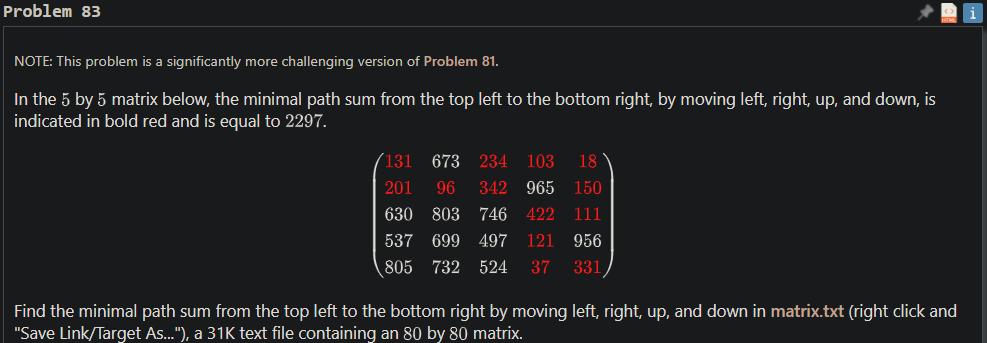

In [1]:
import numpy as np
from colorama import Fore, Back

valores = np.random.randint(10, 100, (20, 90))
for linha in valores:
    for c in linha:
        print (c, end=' ')
    print ('')

56 99 88 23 90 42 64 17 70 17 47 23 88 32 88 62 54 27 32 61 20 25 83 22 49 98 13 60 65 99 24 34 85 38 15 50 60 79 45 12 69 86 13 70 54 54 96 66 71 74 48 72 98 26 89 30 41 45 26 56 10 26 59 81 71 90 60 21 62 65 44 91 36 88 94 57 33 62 39 92 14 43 97 88 96 42 55 66 89 29 
97 54 78 53 27 54 10 80 49 55 72 27 29 82 54 90 62 97 51 38 95 24 22 32 93 98 18 13 91 78 63 89 15 73 90 68 49 14 12 93 25 88 97 98 41 25 23 24 18 16 95 94 68 75 41 94 50 44 16 27 50 15 50 91 80 60 41 57 95 86 17 17 29 85 55 43 88 73 23 50 80 19 21 19 10 82 35 67 30 23 
72 48 50 76 11 82 52 29 92 16 87 50 77 57 40 47 87 65 37 19 11 57 19 76 20 80 97 25 69 81 86 48 48 63 31 41 59 71 64 79 40 20 41 22 15 82 95 62 22 37 21 41 57 79 53 29 92 51 52 89 93 28 21 33 97 23 36 69 47 90 64 72 91 58 56 17 44 43 33 85 60 28 65 65 90 59 43 31 42 13 
70 44 11 30 32 34 10 98 97 20 13 65 63 72 66 33 18 57 75 54 68 67 88 77 37 49 44 18 27 90 95 96 48 40 43 19 16 59 62 55 31 96 46 63 48 50 50 98 99 45 50 28 39 30 75 52 45 35 21 29 57 51 6

# Início

In [2]:
NLINHAS, NCOLUNAS = valores.shape[0], valores.shape[1] # pega o número de linhas e colunas da matriz
NNOS = NLINHAS * NCOLUNAS # calcula o total de nós
print (f'{NLINHAS=}, {NCOLUNAS=}, {NNOS=}')

def definir_vizinhos(y, x):
    """Retorna apenas uma lista de tuplas (y,x) dos vizinhos de cada nó enviado (y,x)"""
    possibilidades = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]]) # cima, baixo, esquerda, direita
    possibilidades = np.array([y, x]) + possibilidades

    vizinhos = [(p[0], p[1]) for p in possibilidades if ((p[0]>=0 and p[0]<NLINHAS) and (p[1]>=0 and p[1]<NCOLUNAS))]
    return vizinhos

def definir_indice(y, x):
    """Retona o valor de índice do nó (y,x) na matriz. Considerando que começa em 0->0,0; 1->0,1 etc..."""
    return NCOLUNAS*y + x

def retorna_posicao(indice):
    """Retorna uma tupla que representa a posição do índice. """
    x = indice % NCOLUNAS
    y = indice // NCOLUNAS
    return y, x

nos_visitados = [] # lista que serão armazenados os números dos nós da matriz
yatual, xatual = 0, 0

# começamos criando uma matriz de memsma dimensão que tem todas as distâncias infinitas
distancias = np.inf * np.ones((NLINHAS, NCOLUNAS))

# como queremos calcular todas as distâncias a partir da posição (0,0), então já fazemos ess parte
# de atualizar a matriz de distâncias igual a de valores, pois não há nenhum deslocamento. Esse é o ponto inicial
distancias[yatual, xatual] = valores[yatual, xatual]

trajeto = np.zeros((NLINHAS, NCOLUNAS)).astype(int) # criamos uma lista que salva o trajeto

for it in range(NNOS):
    valor_atual = distancias[yatual, xatual] # pegamos o valor atual do nó
    indice_atual = definir_indice(yatual, xatual) # descobrimos o número do nó na matriz
    # print (f'no atual: [{indice_atual}] = {valor_atual=}')

    vizinhos = definir_vizinhos(yatual, xatual) # listamos os vizinhos desse nó

    for vz in vizinhos: # para cada vizinho
        valor_vz = valores[vz] # pegamos o valor de cada vizinho
        if (valores[vz] + valor_atual < distancias[vz]): # se o valor atual+valorVZ é menor que a distância já calculada no mesmo vizinho
            distancias[vz] = valores[vz] + valor_atual   # então alteramos o valor dessa distância calculada, pois queremos o menor valor
            trajeto[vz] = indice_atual # guardamos o índice de onde vem a solução de menor custo. Ou seja, no trajeto[y,x] guarda o índice de onde vem a solução
    
    nos_visitados.append(indice_atual) # adicionamos na lista de nos_vizitados esse nó que acabamos de avaliar
    if (len(nos_visitados) == NNOS):   # se o número de nós visitados for igual ao número de nós
        break                          # então acabou o script

    if (len(nos_visitados) % 100 == 0): # apenas para um debug, printar de 100 em 100
        print (f'Total de nós analisados: {len(nos_visitados)}')

    distancias_temp = distancias.copy()             # criamos uma tabela de distâncias temporária para auxiliar o script
    indice_menor_valor = distancias_temp.argmin()   # pegamos o índice do nó de menor valor dessa matriz de distâncias. 
    
    while indice_menor_valor in nos_visitados:      # enquanto o índice de um nó de menor valor estiver na lista de nós visitados
        distancias_temp[retorna_posicao(indice_menor_valor)] = np.inf   # então setamos ele como inf apenas para não cair novamente
        indice_menor_valor = distancias_temp.argmin()           # e tentamos pegar novamente o índice de nó de menor valor.
    
    yatual, xatual = retorna_posicao(indice_menor_valor)    # pegamos a posição y, x desse nó de menor valor e continuamos no for

ultimo_no = NNOS-1 # pegamos o número de índice do último nó, pois ele está exatamente no canto inferior, direito da matriz

distancias = distancias.astype(int)
valor_ultimo_no = distancias[retorna_posicao(ultimo_no)] # e pegamos o seu último valor.
print (f'{valor_ultimo_no=}')

NLINHAS=20, NCOLUNAS=90, NNOS=1800
Total de nós analisados: 100
Total de nós analisados: 200
Total de nós analisados: 300
Total de nós analisados: 400
Total de nós analisados: 500
Total de nós analisados: 600
Total de nós analisados: 700
Total de nós analisados: 800
Total de nós analisados: 900
Total de nós analisados: 1000
Total de nós analisados: 1100
Total de nós analisados: 1200
Total de nós analisados: 1300
Total de nós analisados: 1400
Total de nós analisados: 1500
Total de nós analisados: 1600
Total de nós analisados: 1700
valor_ultimo_no=4284


In [3]:
# Aqui transformamos a lista do trajeto em lista de posições
# Pegamos a lista do trajeto e para cada item, de trás para frente, vemos sua origem e sua tupla (y,x)
posicoes_trajeto = []
indice_no_atual = NNOS - 1
yatual, xatual = retorna_posicao(indice_no_atual)
while yatual > 0 or xatual > 0:
    posicoes_trajeto.append((yatual, xatual))
    indice_origem_no_atual = trajeto[yatual, xatual]
    yatual, xatual = retorna_posicao(indice_origem_no_atual)

posicoes_trajeto.append((0,0))
print (posicoes_trajeto)

[(19, 89), (19, 88), (19, 87), (19, 86), (19, 85), (19, 84), (19, 83), (18, 83), (18, 82), (17, 82), (16, 82), (15, 82), (15, 81), (15, 80), (15, 79), (15, 78), (15, 77), (14, 77), (14, 76), (14, 75), (14, 74), (14, 73), (14, 72), (14, 71), (13, 71), (13, 70), (13, 69), (14, 69), (14, 68), (14, 67), (14, 66), (14, 65), (15, 65), (15, 64), (16, 64), (16, 63), (16, 62), (16, 61), (16, 60), (16, 59), (16, 58), (16, 57), (16, 56), (16, 55), (16, 54), (16, 53), (16, 52), (16, 51), (16, 50), (17, 50), (17, 49), (17, 48), (17, 47), (17, 46), (17, 45), (17, 44), (16, 44), (16, 43), (16, 42), (16, 41), (16, 40), (16, 39), (15, 39), (15, 38), (15, 37), (15, 36), (15, 35), (15, 34), (14, 34), (14, 33), (14, 32), (14, 31), (14, 30), (14, 29), (14, 28), (14, 27), (14, 26), (14, 25), (14, 24), (14, 23), (14, 22), (14, 21), (14, 20), (13, 20), (13, 19), (12, 19), (12, 18), (12, 17), (12, 16), (11, 16), (11, 15), (11, 14), (11, 13), (10, 13), (9, 13), (9, 12), (9, 11), (9, 10), (8, 10), (7, 10), (6, 1

In [4]:
for nl, linha in enumerate(valores):
    for nc, coluna in enumerate(linha):
        print (f'{Back.RED if (nl, nc) in posicoes_trajeto else ""}{valores[nl, nc]}{Back.RESET}', end=' ')
    print ('')

56 99 88 23 90 42 64 17 70 17 47 23 88 32 88 62 54 27 32 61 20 25 83 22 49 98 13 60 65 99 24 34 85 38 15 50 60 79 45 12 69 86 13 70 54 54 96 66 71 74 48 72 98 26 89 30 41 45 26 56 10 26 59 81 71 90 60 21 62 65 44 91 36 88 94 57 33 62 39 92 14 43 97 88 96 42 55 66 89 29 
97 54 78 53 27 54 10 80 49 55 72 27 29 82 54 90 62 97 51 38 95 24 22 32 93 98 18 13 91 78 63 89 15 73 90 68 49 14 12 93 25 88 97 98 41 25 23 24 18 16 95 94 68 75 41 94 50 44 16 27 50 15 50 91 80 60 41 57 95 86 17 17 29 85 55 43 88 73 23 50 80 19 21 19 10 82 35 67 30 23 
72 48 50 76 11 82 52 29 92 16 87 50 77 57 40 47 87 65 37 19 11 57 19 76 20 80 97 25 69 81 86 48 48 63 31 41 59 71 64 79 40 20 41 22 15 82 95 62 22 37 21 41 57 79 53 29 92 51 52 89 93 28 21 33 97 23 36 69 47 90 64 72 91 58 56 17 44 43 33 85 60 28 65 65 90 59 43 31 42 13 
70 44 11 30 32 34 10 98 97 20 13 65 63 72 66 33 18 57 75 54 68 67 88 77 37 49 44 18 27 90 95 96 48 40 43 19 16 59 62 55 31 96 46 63 48 50 50 98 99 45 50 28 39 30 75 52 45 35 21 29 57 51 6